<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">طبقه بندی ارقام انگلیسی</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

(1000, 2000)


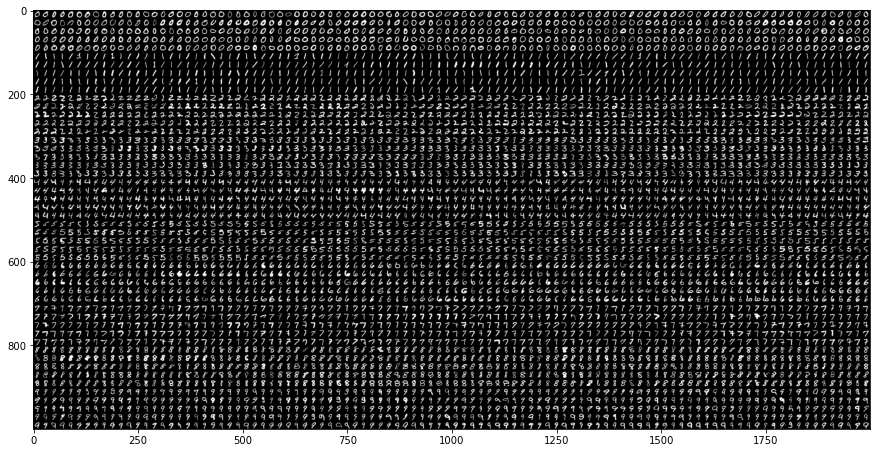

In [2]:
img = cv2.imread('dataset/digits.png', 0)
print(img.shape)
plt.figure(figsize=[15,30])
plt.imshow(img, cmap='gray')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بریدن اعداد از تصویر بزرگ حاوی تمامی اعداد</div>

In [3]:
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]
cells = np.array(cells)
cells.shape

(50, 100, 20, 20)

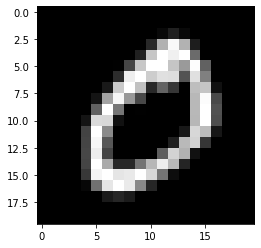

In [4]:
i, j =0, 0
plt.imshow(cells[i,j,:,:], cmap='gray')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تقسیم داده برای آموزش و آزمون و تبدیل به فرمت ورودی مدل</div>

In [5]:
# Now we prepare the training data and test data
train = cells[:,:50].reshape(-1,400).astype(np.float32)
test = cells[:,50:100].reshape(-1,400).astype(np.float32)
print(train.shape)
print(test.shape)

(2500, 400)
(2500, 400)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد لیبل</div>

In [6]:
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش مدل</div>

In [7]:
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

True

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی نتیجه و دقت مدل</div>

In [8]:
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

91.76


https://docs.opencv.org/3.4/d8/d4b/tutorial_py_knn_opencv.html